In [1]:
import warnings 
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1 -  Visualize Data

In [2]:
sales_data = pd.read_csv('data/Tractor-Sales.csv')
sales_data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [3]:
dates = pd.date_range(start='2003-01-01',freq='MS',periods=len(sales_data))
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [4]:
import calendar

sales_data['Month'] = dates.month
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])
sales_data['Year'] = dates.year

sales_data.drop(['Month-Year'],axis=1,inplace=True)
sales_data.rename(columns={'Number of Tractor Sold':'Tractor Sales'},inplace =True)
sales_data = sales_data[['Month','Year','Tractor Sales']]
sales_data.set_index(dates,inplace=True)

sales_data.head()

,Month,Year,Tractor Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [5]:
# Extractout the timeseries
sales_ts = sales_data['Tractor Sales']
sales_ts.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor Sales, dtype: int64

Text(0,0.5,'Tractor Sales')

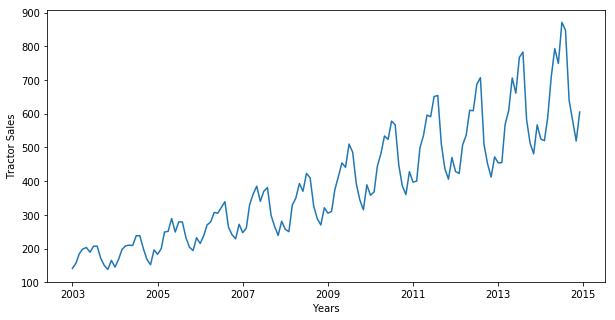

In [6]:
plt.figure(figsize=(10,5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

In [18]:
train_ts = sales_ts[:'2013']
test_ts = sales_ts['2014']

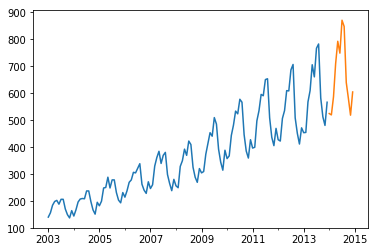

In [21]:
axis = train_ts.plot()
test_ts.plot(ax=axis)

In [39]:
fit_ses = smt.SimpleExpSmoothing(train_ts).fit(smoothing_level=0.6,optimized=False)
ses_fcst_ts = fit_ses.forecast(12)

In [50]:
fit_holt = smt.Holt(train_ts).fit(smoothing_level=0.6,smoothing_slope=0.7)
holt_fcst_ts = fit_holt.forecast(12)

In [54]:
fit_holt_winter = smt.ExponentialSmoothing(train_ts,seasonal_periods=3,trend='add',seasonal='add',).fit()
holt_winter_fcst_ts = fit_holt_winter.forecast(12)

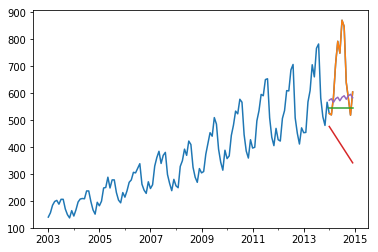

In [55]:
axis = sales_ts.plot()
test_ts.plot(ax=axis)
ses_fcst_ts.plot(ax=axis)
holt_fcst_ts.plot(ax=axis)
holt_winter_fcst_ts.plot(ax=axis)